Advanced: compute_times & compute_phases
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

Let's get started with some basic imports.

In [2]:
import phoebe
from phoebe import u # units

b = phoebe.default_binary()

In [3]:
b.add_dataset('lc', times=phoebe.linspace(0,10,101), dataset='lc01')

<ParameterSet: 73 parameters | contexts: constraint, dataset, figure, compute>

Overriding Computation Times
----------------------------

If `compute_times` is not empty (by either providing `compute_times` *or* `compute_phases`), the provided value will be used to compute the model instead of those in the `times` parameter.

In the case of a [mesh dataset](MESH.ipynb) or [orbit dataset](ORB.ipynb), observations cannot be attached to the dataset, so a `times` parameter does not exist.  In this case `compute_times` or `compute_phases` will *always* be used.

In [4]:
print(b.filter(qualifier=['times', 'compute_times'], context='dataset'))

ParameterSet: 2 parameters
               times@lc01@dataset: [ 0.   0.1  0.2 ...  9.8  9.9 10. ] d
       compute_times@lc01@dataset: [] d


In [5]:
b.set_value('compute_times', phoebe.linspace(0,3,11))

In [6]:
b.run_compute()

100%|██████████| 11/11 [00:00<00:00, 65.23it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [7]:
print("dataset times: {}\ndataset compute_times: {}\nmodel times: {}".format(
    b.get_value('times', context='dataset'),
    b.get_value('compute_times', context='dataset'),
    b.get_value('times', context='model')
    ))

dataset times: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
dataset compute_times: [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
model times: [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]


`compute_times` (when not empty) overrides the value of `times` when computing the model.  However, passing `times` as a keyword argument to [run_compute](../api/phoebe.frontend.bundle.Bundle.run_compute.md) will take precedence over either - and override the computed times across *all* enabled datasets.

In [8]:
b.run_compute(times=[0,0.2])

100%|██████████| 2/2 [00:00<00:00, 19.32it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [9]:
print("dataset times: {}\ndataset compute_times: {}\nmodel times: {}".format(
    b.get_value('times', context='dataset'),
    b.get_value('compute_times', context='dataset'),
    b.get_value('times', context='model')
    ))

dataset times: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
dataset compute_times: [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
model times: [0.  0.2]


In [10]:
b.run_compute()

100%|██████████| 11/11 [00:00<00:00, 65.19it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [11]:
print("dataset times: {}\ndataset compute_times: {}\nmodel times: {}".format(
    b.get_value('times', context='dataset'),
    b.get_value('compute_times', context='dataset'),
    b.get_value('times', context='model')
    ))

dataset times: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
dataset compute_times: [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
model times: [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]


Phase-Time Conversion
----------------------------------

In addition to the ability to provide `compute_times`, we can alternatively provide `compute_phases`.  These two parameters are linked via a constraint (see the [constraints tutorial](./constraints.ipynb)), with `compute_phases` *constrained* by default.

In [12]:
print(b.filter(qualifier=['times', 'compute_times', 'compute_phases', 'compute_phases_t0'], context='dataset'))

ParameterSet: 3 parameters
               times@lc01@dataset: [ 0.   0.1  0.2 ...  9.8  9.9 10. ] d
       compute_times@lc01@dataset: [0.  0.3 0.6 ... 2.4 2.7 3. ] d
C     compute_phases@lc01@dataset: [ 0.   0.3 -0.4 ...  0.4 -0.3  0. ]


Essentially, this constraint does the same thing as [b.to_phase](../api/phoebe.frontend.bundle.Bundle.to_phase.md) or [b.to_time](../api/phoebe.frontend.bundle.Bundle.to_time.md), using the appropriate t0 according to `phases_t0` from the **top-level** orbit in the hierarchy.

In [13]:
print(b.get_constraint('compute_phases'))

Constrains (qualifier): compute_phases
Expression in solar units (value): times_to_phases({compute_times@lc01@dataset}, {period@binary@component}, {dpdt@binary@component}, {phases_t0@lc01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component})
Current Result (result): [ 0.   0.3 -0.4 -0.1  0.2  0.5 -0.2  0.1  0.4 -0.3  0. ]


In [14]:
print(b.get_parameter('phases_t0').choices)

['t0_supconj', 't0_perpass', 't0_ref']


In order to provide `compute_phases` instead of `compute_times`, we must call [b.flip_constraint](../api/phoebe.frontend.bundle.Bundle.flip_constraint.md).

In [15]:
b.flip_constraint('compute_phases', solve_for='compute_times')

<ConstraintParameter: {compute_times@lc01@dataset} = phases_to_times({compute_phases@lc01@dataset}, {period@binary@component}, {dpdt@binary@component}, {phases_t0@lc01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component}) (solar units) => [ 0.   0.3 -0.4 -0.1  0.2  0.5 -0.2  0.1  0.4 -0.3  0. ] d>

In [16]:
b.set_value('compute_phases', phoebe.linspace(0,1,11))

In [17]:
print(b.filter(qualifier=['times', 'compute_times', 'compute_phases', 'phases_t0'], context='dataset'))

ParameterSet: 4 parameters
               times@lc01@dataset: [ 0.   0.1  0.2 ...  9.8  9.9 10. ] d
C      compute_times@lc01@dataset: [0.  0.1 0.2 ... 0.8 0.9 1. ] d
      compute_phases@lc01@dataset: [0.  0.1 0.2 ... 0.8 0.9 1. ]
           phases_t0@lc01@dataset: t0_supconj


Note that under the hood, PHOEBE **always** works in time-space, meaning it is the *constrained* value of `compute_times` that is being passed under-the-hood.

Also note that if directly passing `compute_phases` to [b.add_dataset](../api/phoebe.frontend.bundle.Bundle.add_dataset.md), the constraint will be flipped on our behalf.  We would then need to flip the constraint in order to provide `compute_times` instead.

Finally, it is important to make the distinction that this is **not** adding support for **observations** in phases.  If we have an old light curve that is only available in phase, we still must convert these to times manually (or via [b.to_time](../api/phoebe.frontend.bundle.Bundle.to_time.md)).  This restriction is intentional: we do not want the mapping between phase and time to change as the ephemeris is changed or fitted, rather we want to try to map from phase to time using the ephemeris that was originally used when the dataset was recorded (if possible, or the best possible guess).

Interpolating the Model
------------------------------

Whether or not we used `compute_times`/`compute_phases` or not, it is sometimes useful to be able to interpolate on the resulting model.  In the case where we provided `compute_times`/`compute_phases` to "down-sample" from a large dataset, this can be particularly useful.

We can call [interp_value](../api/phoebe.parameters.FloatArrayParameter.interp_value.md) on any [FloatArrayParameter](../api/phoebe.parameters.FloatArrayParameter.md).  

In [18]:
b.get_parameter('fluxes', context='model').get_value()

array([0.98295179, 2.00574046, 1.99149134, 1.99134384, 2.00559345,
       0.98295179, 2.00574046, 1.99149134, 1.99134384, 2.00559345,
       0.98295179])

In [19]:
b.get_parameter('fluxes', context='model').interp_value(times=1.0)

1.9960937087074677

In [20]:
b.get_parameter('fluxes', context='model').interp_value(times=phoebe.linspace(0,3,101))

array([0.98295179, 1.08523066, 1.18750952, 1.28978839, 1.39206726,
       1.49434612, 1.59662499, 1.69890386, 1.80118272, 1.90346159,
       2.00574046, 2.00431555, 2.00289063, 2.00146572, 2.00004081,
       1.9986159 , 1.99719099, 1.99576608, 1.99434116, 1.99291625,
       1.99149134, 1.99147659, 1.99146184, 1.99144709, 1.99143234,
       1.99141759, 1.99140284, 1.99138809, 1.99137334, 1.99135859,
       1.99134384, 1.9927688 , 1.99419376, 1.99561872, 1.99704368,
       1.99846864, 1.9998936 , 2.00131856, 2.00274352, 2.00416848,
       2.00559345, 1.90332928, 1.80106511, 1.69880095, 1.59653678,
       1.49427262, 1.39200845, 1.28974429, 1.18748012, 1.08521596,
       0.98295179, 1.08523066, 1.18750952, 1.28978839, 1.39206726,
       1.49434612, 1.59662499, 1.69890386, 1.80118272, 1.90346159,
       2.00574046, 2.00431555, 2.00289063, 2.00146572, 2.00004081,
       1.9986159 , 1.99719099, 1.99576608, 1.99434116, 1.99291625,
       1.99149134, 1.99147659, 1.99146184, 1.99144709, 1.99143

In the case of times, this will *automatically* interpolate in phase-space if the provided time is outside the range of the referenced times array.  If you have a logger enabled with at least the 'warning' level, this will raise a warning and state the phases at which the interpolation will be completed.

In [21]:
b.get_parameter('fluxes', context='model').interp_value(times=5)

0.9829517904235248

Determining & Plotting Residuals
----------------------------

One particularly useful case for interpolating is to compare a model (perhaps computed in phase-space) to a dataset with a large number of datapoints.  We can do this directly by calling [compute_residuals](../api/phoebe.parameters.ParameterSet.compute_residuals.md), which will handle any necessary interpolation and compare the dependent variable between the dataset and models.

Note that if there are more than one dataset or model attached to the bundle, it may be necessary to pass `dataset` and/or `model` (or filter in advanced and call compute_residuals on the filtered [ParameterSet](../api/phoebe.paraemters.ParameterSet.md).

To see this in action, we'll first create a "fake" observational dataset, add some noise, recompute the model using `compute_phases`, and then calculate the residuals.

In [22]:
b.add_dataset('lc', 
              times=phoebe.linspace(0,10,1000),
              dataset='lc01',
              overwrite=True)

<ParameterSet: 43 parameters | contexts: constraint, dataset, figure, compute>

In [23]:
b.run_compute(irrad_method='none')

100%|██████████| 1000/1000 [00:11<00:00, 84.15it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [24]:
fluxes = b.get_value('fluxes', context='model')
b.set_value('fluxes', context='dataset', value=fluxes)

In [25]:
b.flip_constraint('compute_phases', solve_for='compute_times')

<ConstraintParameter: {compute_times@lc01@dataset} = phases_to_times({compute_phases@lc01@dataset}, {period@binary@component}, {dpdt@binary@component}, {phases_t0@lc01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component}) (solar units) => [] d>

In [26]:
b.set_value('compute_phases', phoebe.linspace(0,1,101))

In [27]:
b.set_value('teff', component='primary', value=5950)

In [28]:
b.run_compute(irrad_method='none')

100%|██████████| 101/101 [00:01<00:00, 73.50it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

In [29]:
print(len(b.get_value('fluxes', context='dataset')), len(b.get_value('fluxes', context='model')))

1000 101


In [30]:
b.calculate_residuals()

<Quantity [-0.03919259, -0.03891473, -0.03892592, -0.0390291 , -0.03912399,
           -0.03906194, -0.03896983, -0.0391932 , -0.03922817, -0.039223  ,
           -0.03931289, -0.03935991, -0.03939581, -0.03940949, -0.03943771,
           -0.03949875, -0.03958616, -0.03963467, -0.03966851, -0.03970103,
           -0.03969459, -0.03972186, -0.03979163, -0.03979245, -0.03984494,
           -0.03968708, -0.03983116, -0.03982519, -0.03978305, -0.03992245,
           -0.03981527, -0.03977707, -0.03959781, -0.03969196, -0.03951844,
           -0.03952143, -0.0393614 , -0.03947918, -0.03940271, -0.03935815,
           -0.03926228, -0.03930334, -0.0392275 , -0.03894731, -0.03701471,
           -0.03461487, -0.029458  , -0.02243477, -0.01477014, -0.00780992,
           -0.1702242 , -0.00743577, -0.0151405 , -0.02286919, -0.02956625,
           -0.0344172 , -0.03777343, -0.03931521, -0.03928961, -0.03924041,
           -0.03937496, -0.0393687 , -0.03938041, -0.03933989, -0.03951704,
           -

If we plot the dataset and model, we see that the model was only computed for one cycle, whereas the dataset extends further in time.

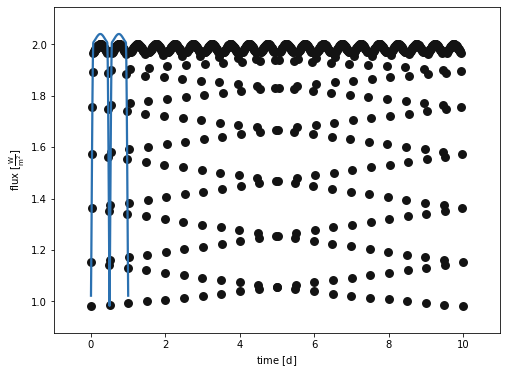

In [31]:
afig, mplfig = b.plot(show=True)

But we can also plot the residuals.  Here, [calculate_residuals](../api/phoebe.parameters.ParameterSet.calculate_residuals.md) is called internally, interpolating in phase-space, and then plotted in time-space.  See the options for `y` in the [plot API docs](../api/phoebe.parameters.ParameterSet.plot.md) for more details.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


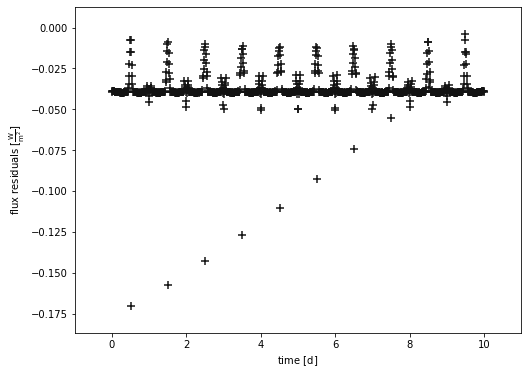

In [32]:
afig, mplfig = b.plot(y='residuals', show=True)

## See Also

The following other advanced tutorials may interest you:
* [Advanced: Phase Masking](./mask_phases.ipynb)
* [Advanced: Solver Times](./solver_times.ipynb)